In [1]:
import numpy as np
import pandas as pd
from scipy.stats import skew
import gc 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
from functools import reduce
import warnings 
warnings.filterwarnings("ignore", category=Warning)

In [2]:
data = pd.read_csv("../data/2_subject_with_48hrs_obs.csv")
data 

,subject_id,hadm_id,stay_id,charttime,itemid,value,valuenum,valueuom,valuenum_capped,first_careunit,last_careunit,intime,outtime,los,duration_hours
0,10000690,25860671,37081114,2150-11-04 12:00:00,223835,50,50.00,NaN,50.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2150-11-02 19:37:00,2150-11-06 17:03:17,3.893252,93.438056
1,10000690,25860671,37081114,2150-11-04 18:00:00,223835,70,70.00,NaN,70.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2150-11-02 19:37:00,2150-11-06 17:03:17,3.893252,93.438056
2,10000690,25860671,37081114,2150-11-02 19:54:00,220045,79,79.00,bpm,79.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2150-11-02 19:37:00,2150-11-06 17:03:17,3.893252,93.438056
3,10000690,25860671,37081114,2150-11-02 19:54:00,220179,107,107.00,mmHg,107.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2150-11-02 19:37:00,2150-11-06 17:03:17,3.893252,93.438056
4,10000690,25860671,37081114,2150-11-02 19:54:00,220210,23,23.00,insp/min,23.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2150-11-02 19:37:00,2150-11-06 17:03:17,3.893252,93.438056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8610466,19999987,23865745,36195440,2145-11-04 05:01:00,220645,147,147.00,mEq/L,147.00,Trauma SICU (TSICU),Trauma SICU (TSICU),2145-11-02 22:59:00,2145-11-04 21:29:30,1.937847,46.508333
8610467,19999987,23865745,36195440,2145-11-04 05:01:00,225624,22,22.00,mg/dL,22.00,Trauma SICU (TSICU),Trauma SICU (TSICU),2145-11-02 22:59:00,2145-11-04 21:29:30,1.937847,46.508333
8610468,19999987,23865745,36195440,2145-11-04 07:18:00,220224,69,69.00,mmHg,69.00,Trauma SICU (TSICU),Trauma SICU (TSICU),2145-11-02 22:59:00,2145-11-04 21:29:30,1.937847,46.508333
8610469,19999987,23865745,36195440,2145-11-04 07:18:00,223830,7.42,7.42,units,7.42,Trauma SICU (TSICU),Trauma SICU (TSICU),2145-11-02 22:59:00,2145-11-04 21:29:30,1.937847,46.508333


In [3]:
data_raw= data.drop(['valuenum','value','valueuom','los','duration_hours', 'intime','outtime','los'], axis=1).copy()
data_raw

,subject_id,hadm_id,stay_id,charttime,itemid,valuenum_capped,first_careunit,last_careunit
0,10000690,25860671,37081114,2150-11-04 12:00:00,223835,50.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
1,10000690,25860671,37081114,2150-11-04 18:00:00,223835,70.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
2,10000690,25860671,37081114,2150-11-02 19:54:00,220045,79.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
3,10000690,25860671,37081114,2150-11-02 19:54:00,220179,107.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
4,10000690,25860671,37081114,2150-11-02 19:54:00,220210,23.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
...,...,...,...,...,...,...,...,...
8610466,19999987,23865745,36195440,2145-11-04 05:01:00,220645,147.00,Trauma SICU (TSICU),Trauma SICU (TSICU)
8610467,19999987,23865745,36195440,2145-11-04 05:01:00,225624,22.00,Trauma SICU (TSICU),Trauma SICU (TSICU)
8610468,19999987,23865745,36195440,2145-11-04 07:18:00,220224,69.00,Trauma SICU (TSICU),Trauma SICU (TSICU)
8610469,19999987,23865745,36195440,2145-11-04 07:18:00,223830,7.42,Trauma SICU (TSICU),Trauma SICU (TSICU)


In [4]:
# read data from the other tables admission and patints

admission = pd.read_csv('../mimic-iv-3.1/hosp/admissions.csv')

data_raw_admission = pd.merge(admission[['subject_id','hadm_id','insurance','race','hospital_expire_flag']],
             data_raw, on=['subject_id','hadm_id'],how='inner')

data_raw_admission

,subject_id,hadm_id,insurance,race,hospital_expire_flag,stay_id,charttime,itemid,valuenum_capped,first_careunit,last_careunit
0,10000690,25860671,Medicare,WHITE,0,37081114,2150-11-04 12:00:00,223835,50.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
1,10000690,25860671,Medicare,WHITE,0,37081114,2150-11-04 18:00:00,223835,70.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
2,10000690,25860671,Medicare,WHITE,0,37081114,2150-11-02 19:54:00,220045,79.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
3,10000690,25860671,Medicare,WHITE,0,37081114,2150-11-02 19:54:00,220179,107.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
4,10000690,25860671,Medicare,WHITE,0,37081114,2150-11-02 19:54:00,220210,23.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
...,...,...,...,...,...,...,...,...,...,...,...
8610466,19999987,23865745,Medicaid,UNKNOWN,0,36195440,2145-11-04 05:01:00,220645,147.00,Trauma SICU (TSICU),Trauma SICU (TSICU)
8610467,19999987,23865745,Medicaid,UNKNOWN,0,36195440,2145-11-04 05:01:00,225624,22.00,Trauma SICU (TSICU),Trauma SICU (TSICU)
8610468,19999987,23865745,Medicaid,UNKNOWN,0,36195440,2145-11-04 07:18:00,220224,69.00,Trauma SICU (TSICU),Trauma SICU (TSICU)
8610469,19999987,23865745,Medicaid,UNKNOWN,0,36195440,2145-11-04 07:18:00,223830,7.42,Trauma SICU (TSICU),Trauma SICU (TSICU)


In [5]:
patient = pd.read_csv('../mimic-iv-3.1/hosp/patients.csv')

subject_raw_data = pd.merge(data_raw_admission,patient[['subject_id','gender','anchor_age']], on=['subject_id'],how='inner')
subject_raw_data

,subject_id,hadm_id,insurance,race,hospital_expire_flag,stay_id,charttime,itemid,valuenum_capped,first_careunit,last_careunit,gender,anchor_age
0,10000690,25860671,Medicare,WHITE,0,37081114,2150-11-04 12:00:00,223835,50.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,86
1,10000690,25860671,Medicare,WHITE,0,37081114,2150-11-04 18:00:00,223835,70.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,86
2,10000690,25860671,Medicare,WHITE,0,37081114,2150-11-02 19:54:00,220045,79.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,86
3,10000690,25860671,Medicare,WHITE,0,37081114,2150-11-02 19:54:00,220179,107.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,86
4,10000690,25860671,Medicare,WHITE,0,37081114,2150-11-02 19:54:00,220210,23.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8610466,19999987,23865745,Medicaid,UNKNOWN,0,36195440,2145-11-04 05:01:00,220645,147.00,Trauma SICU (TSICU),Trauma SICU (TSICU),F,57
8610467,19999987,23865745,Medicaid,UNKNOWN,0,36195440,2145-11-04 05:01:00,225624,22.00,Trauma SICU (TSICU),Trauma SICU (TSICU),F,57
8610468,19999987,23865745,Medicaid,UNKNOWN,0,36195440,2145-11-04 07:18:00,220224,69.00,Trauma SICU (TSICU),Trauma SICU (TSICU),F,57
8610469,19999987,23865745,Medicaid,UNKNOWN,0,36195440,2145-11-04 07:18:00,223830,7.42,Trauma SICU (TSICU),Trauma SICU (TSICU),F,57


In [6]:
subject_raw_data.nunique()

subject_id                44421
hadm_id                   44421
insurance                     5
race                         33
hospital_expire_flag          2
stay_id                   44421
charttime               2158763
itemid                       14
valuenum_capped            1311
first_careunit               16
last_careunit                16
gender                        2
anchor_age                   73
dtype: int64

In [7]:
# mapping the names and 
def map_race(race_str):
    if pd.isnull(race_str):
        return 'Other'
    race_str = race_str.upper()
    if race_str.startswith('WHITE') or race_str in ['PORTUGUESE']:
        return 'White'
    elif 'BLACK' in race_str or 'AFRICAN' in race_str:
        return 'Black'
    elif race_str.startswith('ASIAN'):
        return 'Asian'
    elif race_str.startswith('HISPANIC') or 'SOUTH AMERICAN' in race_str or 'CENTRAL AMERICAN' in race_str:
        return 'Hispanic'
    else:
        return 'Other'
    
def map_age_group(age):
    if 18 <= age <= 49:
        return 1
    elif 50 <= age <= 89:
        return 2
    elif age >= 90:
        return 3
    else:
        return np.nan
    
insurance_map = {
    'Medicare': 'Medicare',
    'Medicaid': 'Medicaid',
    'Private': 'Private',
    'Other': 'Other',
    'No charge': 'Other',
    '': 'Other'}

race_map = {
    'White': 'White',
    'Black': 'Black',
    'Asian': 'Asian',
    'Hispanic': 'Hispanic',
    'Other': 'Other',
    '' : 'Other'}

def map_column(df, column_name, mapping_dict, missing_value=None, additional_logic=None):
    
    df[column_name] = df[column_name].fillna(missing_value)
    
    if additional_logic:
        df[column_name] = df[column_name].apply(additional_logic)
    
    df[column_name] = df[column_name].map(mapping_dict)
    
    return df

In [20]:
subject_raw_data_mapped = subject_raw_data.copy()

In [21]:
subject_raw_data_mapped = map_column(subject_raw_data_mapped, 'race', race_map, missing_value='', additional_logic=map_race)

subject_raw_data_mapped = map_column(subject_raw_data_mapped, 'insurance', insurance_map, missing_value='', additional_logic=None)

subject_raw_data_mapped['anchor_age'] = subject_raw_data_mapped['anchor_age'].apply(map_age_group)

subject_raw_data_mapped

,subject_id,hadm_id,insurance,race,hospital_expire_flag,stay_id,charttime,itemid,valuenum_capped,first_careunit,last_careunit,gender,anchor_age
0,10000690,25860671,Medicare,White,0,37081114,2150-11-04 12:00:00,223835,50.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,2
1,10000690,25860671,Medicare,White,0,37081114,2150-11-04 18:00:00,223835,70.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,2
2,10000690,25860671,Medicare,White,0,37081114,2150-11-02 19:54:00,220045,79.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,2
3,10000690,25860671,Medicare,White,0,37081114,2150-11-02 19:54:00,220179,107.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,2
4,10000690,25860671,Medicare,White,0,37081114,2150-11-02 19:54:00,220210,23.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8610466,19999987,23865745,Medicaid,Other,0,36195440,2145-11-04 05:01:00,220645,147.00,Trauma SICU (TSICU),Trauma SICU (TSICU),F,2
8610467,19999987,23865745,Medicaid,Other,0,36195440,2145-11-04 05:01:00,225624,22.00,Trauma SICU (TSICU),Trauma SICU (TSICU),F,2
8610468,19999987,23865745,Medicaid,Other,0,36195440,2145-11-04 07:18:00,220224,69.00,Trauma SICU (TSICU),Trauma SICU (TSICU),F,2
8610469,19999987,23865745,Medicaid,Other,0,36195440,2145-11-04 07:18:00,223830,7.42,Trauma SICU (TSICU),Trauma SICU (TSICU),F,2


In [10]:
subject_raw_data_mapped.to_csv('../data/3_raw_data_mapped.csv', index=False)

In [22]:
# total summary:  cohort desciption , dataset decsription 
demographics_df = subject_raw_data_mapped.drop_duplicates(subset="subject_id")

def summarize_group(df, col):
    summary = df.groupby(col).agg(
        total_patients=("subject_id", "count"),
        num_deaths=("hospital_expire_flag", "sum")
    ).reset_index()
    summary["num_survived"] = summary["total_patients"] - summary["num_deaths"]
    summary["group"] = col 
    summary = summary.rename(columns={col: "category"}) 
    return summary[["group", "category", "total_patients", "num_deaths", "num_survived"]]

group_cols = ["insurance", "race", "gender"]

summaries = [summarize_group(demographics_df, col) for col in group_cols]
final_summary = pd.concat(summaries, ignore_index=True)

final_summary


,group,category,total_patients,num_deaths,num_survived
0,insurance,Medicaid,6068,530,5538
1,insurance,Medicare,24159,2909,21250
2,insurance,Other,1887,220,1667
3,insurance,Private,12307,801,11506
4,race,Asian,1332,152,1180
5,race,Black,3904,353,3551
6,race,Hispanic,1587,131,1456
7,race,Other,7734,1110,6624
8,race,White,29864,2714,27150
9,gender,F,19163,2073,17090


In [ ]:
# Monitoring frequency: how often a patient is monitored (total number of observations per 48 h)

In [23]:
subject_raw_data_mapped['charttime'] = pd.to_datetime(subject_raw_data_mapped['charttime'])

subject_start_times = subject_raw_data_mapped.groupby("subject_id")["charttime"].min()

subject_raw_data_mapped = subject_raw_data_mapped.merge(subject_start_times.rename("start_time"), on="subject_id")

subject_raw_data_mapped["time_diff_hours"] = (subject_raw_data_mapped["charttime"] - 
                                              subject_raw_data_mapped["start_time"]).dt.total_seconds() / 3600

data_pre = subject_raw_data_mapped[subject_raw_data_mapped["time_diff_hours"] <= 48] 
data_pre


,subject_id,hadm_id,insurance,race,hospital_expire_flag,stay_id,charttime,itemid,valuenum_capped,first_careunit,last_careunit,gender,anchor_age,start_time,time_diff_hours
0,10000690,25860671,Medicare,White,0,37081114,2150-11-04 12:00:00,223835,50.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,2,2150-11-02 19:05:00,40.916667
1,10000690,25860671,Medicare,White,0,37081114,2150-11-04 18:00:00,223835,70.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,2,2150-11-02 19:05:00,46.916667
2,10000690,25860671,Medicare,White,0,37081114,2150-11-02 19:54:00,220045,79.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,2,2150-11-02 19:05:00,0.816667
3,10000690,25860671,Medicare,White,0,37081114,2150-11-02 19:54:00,220179,107.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,2,2150-11-02 19:05:00,0.816667
4,10000690,25860671,Medicare,White,0,37081114,2150-11-02 19:54:00,220210,23.00,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),F,2,2150-11-02 19:05:00,0.816667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8610466,19999987,23865745,Medicaid,Other,0,36195440,2145-11-04 05:01:00,220645,147.00,Trauma SICU (TSICU),Trauma SICU (TSICU),F,2,2145-11-02 23:00:00,30.016667
8610467,19999987,23865745,Medicaid,Other,0,36195440,2145-11-04 05:01:00,225624,22.00,Trauma SICU (TSICU),Trauma SICU (TSICU),F,2,2145-11-02 23:00:00,30.016667
8610468,19999987,23865745,Medicaid,Other,0,36195440,2145-11-04 07:18:00,220224,69.00,Trauma SICU (TSICU),Trauma SICU (TSICU),F,2,2145-11-02 23:00:00,32.300000
8610469,19999987,23865745,Medicaid,Other,0,36195440,2145-11-04 07:18:00,223830,7.42,Trauma SICU (TSICU),Trauma SICU (TSICU),F,2,2145-11-02 23:00:00,32.300000


In [ ]:
def calculate_48hr_time_metrics(data_pre):

    data_pre["hour_in_48"] = data_pre["time_diff_hours"].astype(int)

    subgroup_cols = ["insurance", "race", "gender"]

    results = {}

    for col in subgroup_cols:
        print(f"Calculating 48-hour metrics for subgroups based on: {col}")

        # total number of measurements in 48 hrs
        measurement_frequency = data_pre.groupby([col, "itemid"])["valuenum_capped"].count().rename("measurement_frequency").reset_index()

        # how many distinct hours had data
        observed_hours = data_pre[data_pre["valuenum_capped"].notna()].groupby([col, "itemid", "subject_id"])["hour_in_48"].nunique()

        all_combinations = data_pre.groupby([col, "itemid", "subject_id"]).size().index
        observed_hours = observed_hours.reindex(all_combinations, fill_value=0)

        total_possible_hours = 48
        missing_hours = (total_possible_hours - observed_hours).rename("missing_hours")
              
        missingness_rate = (missing_hours.groupby([col, "itemid"]).mean() / 48).rename("missingness_rate").reset_index()

        combined_metrics = pd.merge(measurement_frequency, missingness_rate, on=[col, "itemid"])
        
        combined_metrics["missing_hours"] = (combined_metrics["missingness_rate"] * 48).round(1)

        results[col] = combined_metrics

    return results

In [25]:
metrics = calculate_48hr_time_metrics(data_pre)
metrics

Calculating 48-hour metrics for subgroups based on: insurance
Calculating 48-hour metrics for subgroups based on: race
Calculating 48-hour metrics for subgroups based on: gender


{'insurance':    insurance  itemid  measurement_frequency  missingness_rate  missing_hours
 0   Medicaid  220045                 272008          0.187111            9.0
 1   Medicaid  220179                 188623          0.396410           19.0
 2   Medicaid  220210                 268230          0.196397            9.4
 3   Medicaid  220224                  12997          0.902287           43.3
 4   Medicaid  220545                  21673          0.925233           44.4
 5   Medicaid  220615                  19857          0.931502           44.7
 6   Medicaid  220645                  20488          0.929313           44.6
 7   Medicaid  220739                  74148          0.749143           36.0
 8   Medicaid  223761                  75685          0.750305           36.0
 9   Medicaid  223830                  13525          0.898937           43.1
 10  Medicaid  223835                  25809          0.831604           39.9
 11  Medicaid  223900                  73832       

In [26]:
# Split dataset
data_death = data_pre[data_pre["hospital_expire_flag"] == 1]
data_survived = data_pre[data_pre["hospital_expire_flag"] == 0]

metrics_death = calculate_48hr_time_metrics(data_death)
metrics_survived = calculate_48hr_time_metrics(data_survived)


Calculating 48-hour metrics for subgroups based on: insurance
Calculating 48-hour metrics for subgroups based on: race
Calculating 48-hour metrics for subgroups based on: gender
Calculating 48-hour metrics for subgroups based on: insurance
Calculating 48-hour metrics for subgroups based on: race
Calculating 48-hour metrics for subgroups based on: gender


In [29]:
metrics_death

{'insurance':    insurance  itemid  measurement_frequency  missingness_rate  missing_hours
 0   Medicaid  220045                  26822          0.132812            6.4
 1   Medicaid  220179                  16237          0.417763           20.1
 2   Medicaid  220210                  26298          0.141445            6.8
 3   Medicaid  220224                   2393          0.859799           41.3
 4   Medicaid  220545                   2391          0.904303           43.4
 5   Medicaid  220615                   2396          0.904677           43.4
 6   Medicaid  220645                   2565          0.897905           43.1
 7   Medicaid  220739                   6848          0.735035           35.3
 8   Medicaid  223761                   7731          0.706189           33.9
 9   Medicaid  223830                   2407          0.859360           41.2
 10  Medicaid  223835                   4615          0.770833           37.0
 11  Medicaid  223900                   6815       

In [30]:
metrics_survived

{'insurance':    insurance  itemid  measurement_frequency  missingness_rate  missing_hours
 0   Medicaid  220045                 245186          0.192303            9.2
 1   Medicaid  220179                 172386          0.394453           18.9
 2   Medicaid  220210                 241932          0.201646            9.7
 3   Medicaid  220224                  10604          0.908752           43.6
 4   Medicaid  220545                  19282          0.927208           44.5
 5   Medicaid  220615                  17461          0.934048           44.8
 6   Medicaid  220645                  17923          0.932295           44.8
 7   Medicaid  220739                  67300          0.750494           36.0
 8   Medicaid  223761                  67954          0.754442           36.2
 9   Medicaid  223830                  11118          0.904925           43.4
 10  Medicaid  223835                  21194          0.840943           40.4
 11  Medicaid  223900                  67017       

In [31]:
# Vital signs (like heart rate, blood pressure, temperature) are measured regularly throughout the ICU stay.
# So, it makes sense to calculate both how often they are measured (frequency) and how often measurements are missing (missingness).
# Lab tests, on the other hand, are not done regularly but are ordered as needed.
# Calculating missingness for lab tests is not meaningful since absence of measurement is expected.

vital_sign_ids = [220045, 220739, 223900, 223901, 220210, 223761, 220179, 223835]

In [103]:
# For patients who died
df_ins_death = metrics_death["insurance"]
df_ins_death_vital = df_ins_death[df_ins_death["itemid"].isin(vital_sign_ids)]

# For patients who survived
df_ins_surv = metrics_survived["insurance"]
df_ins_surv_vital = df_ins_surv[df_ins_surv["itemid"].isin(vital_sign_ids)]

itemid_labels = {
    220045: "Heart Rate",
    220739: "GCS Eye",
    223900: "GCS Verbal",
    223901: "GCS Motor",
    220210: "Respiratory Rate",
    223761: "Temperature",
    220179: "Systolic BP",
    223835: "FiO2"}

itemid_labels = {
    220045: "Heart Rate",
    220739: "GCS Eye",
    223900: "GCS Verbal",
    223901: "GCS Motor",
    220210: "Resp Rate",
    223761: "Temp",
    220179: "Systolic BP",
    223835: "FiO2"}

df_ins_death_vital["item_name"] = df_ins_death_vital["itemid"].map(itemid_labels)
df_ins_surv_vital["item_name"] = df_ins_surv_vital["itemid"].map(itemid_labels)

df_ins_death_vital_filtered = df_ins_death_vital[df_ins_death_vital["insurance"].isin(["Medicaid", "Medicare","Private"])]

df_ins_surv_vital_filtered= df_ins_surv_vital[df_ins_surv_vital["insurance"].isin(["Medicaid", "Medicare","Private"])]


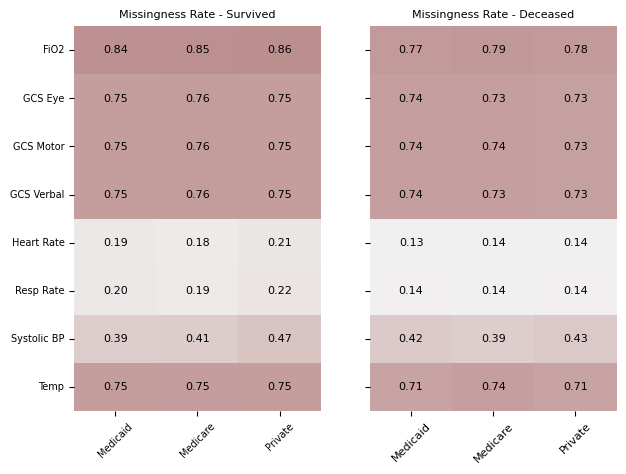

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(7,5), sharey=True)  # slightly narrower width

vmin = min(df_ins_death_vital_filtered['missingness_rate'].min(),
           df_ins_surv_vital_filtered['missingness_rate'].min())
vmax = max(df_ins_death_vital_filtered['missingness_rate'].max(),
           df_ins_surv_vital_filtered['missingness_rate'].max())

soft_red_1 = sns.light_palette("rosybrown", as_cmap=True)

# Survived patients heatmap
pivot_surv = df_ins_surv_vital_filtered.pivot_table(index='item_name', columns='insurance', values='missingness_rate')
sns.heatmap(pivot_surv, cmap=soft_red_1, annot=True, fmt=".2f",
            ax=axes[0], vmin=vmin, vmax=vmax, cbar=False,
            annot_kws={"size":8, "color":"black"})
axes[0].set_title("Missingness Rate - Survived", fontsize=8)
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].tick_params(axis='x', labelsize=7, rotation=45) 
axes[0].tick_params(axis='y', labelsize=7)       

# Deceased patients heatmap
pivot_death = df_ins_death_vital_filtered.pivot_table(index='item_name', columns='insurance', values='missingness_rate')
sns.heatmap(pivot_death, cmap=soft_red_1, annot=True, fmt=".2f",
            ax=axes[1], vmin=vmin, vmax=vmax, cbar=False,
            annot_kws={"size":8, "color":"black"})
axes[1].set_title("Missingness Rate - Deceased", fontsize=8)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', labelsize=8, rotation=45) 
axes[1].tick_params(axis='y', labelsize=7) 

# Colorbar label
#cbar_ax.set_title("Missingness Rate (fraction of 48 hrs)", fontsize=8)

# Adjust layout
#plt.tight_layout(rect=[0, 0.12, 1, 1])
plt.savefig("miss_insurance_final.pdf", bbox_inches='tight', dpi=300)
#plt.savefig("vital_sign_miss_ins.png", bbox_inches='tight', dpi=300)
plt.show()


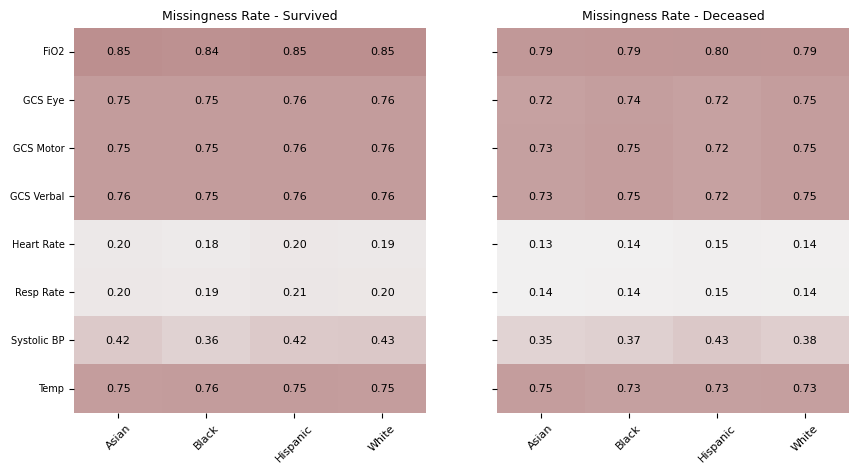

In [109]:
df_race_death = metrics_death["race"]
df_race_death_vital = df_race_death[df_race_death["itemid"].isin(vital_sign_ids)]

# For patients who survived
df_race_surv = metrics_survived["race"]
df_race_surv_vital = df_race_surv[df_race_surv["itemid"].isin(vital_sign_ids)]

itemid_labels = {
    220045: "Heart Rate",
    220739: "GCS Eye",
    223900: "GCS Verbal",
    223901: "GCS Motor",
    220210: "Resp Rate",
    223761: "Temp",
    220179: "Systolic BP",
    223835: "FiO2"}

df_race_death_vital["item_name"] = df_race_death_vital["itemid"].map(itemid_labels)
df_race_surv_vital["item_name"] = df_race_surv_vital["itemid"].map(itemid_labels)

df_race_death_vital_filtered = df_race_death_vital[df_race_death_vital["race"].isin
                                                   (["White", "Black","Asian","Hispanic"])]

df_race_surv_vital_filtered= df_race_surv_vital[df_race_surv_vital["race"].isin
                                                (["White", "Black","Asian","Hispanic"])]

fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)  

vmin = min(df_race_death_vital_filtered['missingness_rate'].min(),
           df_race_surv_vital_filtered['missingness_rate'].min())
vmax = max(df_race_death_vital_filtered['missingness_rate'].max(),
           df_race_surv_vital_filtered['missingness_rate'].max())

#cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.03]) 
#soft_red_1 = sns.light_palette("rosybrown", as_cmap=True)

# Survived patients heatmap
pivot_surv = df_race_surv_vital_filtered.pivot_table(index='item_name', columns='race', values='missingness_rate')
sns.heatmap(pivot_surv, cmap=soft_red_1, annot=True, fmt=".2f",
            ax=axes[0], vmin=vmin, vmax=vmax, cbar=False,
            annot_kws={"size":8, "color":"black"})
axes[0].set_title("Missingness Rate - Survived", fontsize=9)
axes[0].set_xlabel("", fontsize=8)
axes[0].set_ylabel("", fontsize=6)
axes[0].tick_params(axis='x', labelsize=8, rotation=45) 
axes[0].tick_params(axis='y', labelsize=7) 

# Deceased patients heatmap
pivot_death = df_race_death_vital_filtered.pivot_table(index='item_name', columns='race', values='missingness_rate')
sns.heatmap(pivot_death, cmap=soft_red_1, annot=True, fmt=".2f",
            ax=axes[1], vmin=vmin, vmax=vmax, cbar= False,
            cbar_kws={'orientation': 'horizontal'},
            annot_kws={"size":8, "color":"black"})
axes[1].set_title("Missingness Rate - Deceased", fontsize=9)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', labelsize=8, rotation=45) 
axes[1].tick_params(axis='y', labelsize=7) 

# Colorbar label
#cbar_ax.set_title("Missingness Rate (fraction of 48 hrs)", fontsize=8)

# Adjust layout
#plt.tight_layout(rect=[0, 0.12, 1, 1])
plt.savefig("missingness_race_final.pdf", bbox_inches='tight', dpi=300)
#plt.savefig("missingness_heatmaps_race.png", bbox_inches='tight', dpi=300)
plt.show()



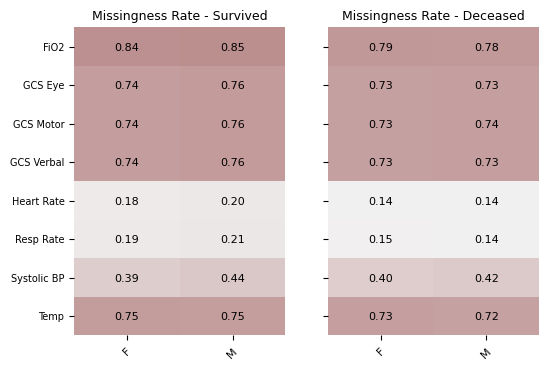

In [112]:
df_gender_death = metrics_death["gender"]
df_gender_death_vital = df_gender_death[df_gender_death["itemid"].isin(vital_sign_ids)]

# For patients who survived
df_gender_surv = metrics_survived["gender"]
df_gender_surv_vital = df_gender_surv[df_gender_surv["itemid"].isin(vital_sign_ids)]

itemid_labels = {
    220045: "Heart Rate",
    220739: "GCS Eye",
    223900: "GCS Verbal",
    223901: "GCS Motor",
    220210: "Resp Rate",
    223761: "Temp",
    220179: "Systolic BP",
    223835: "FiO2"}

df_gender_death_vital["item_name"] = df_gender_death_vital["itemid"].map(itemid_labels)
df_gender_surv_vital["item_name"] = df_gender_surv_vital["itemid"].map(itemid_labels)

fig, axes = plt.subplots(1, 2, figsize=(6,4), sharey=True)  

vmin = min(df_gender_death_vital['missingness_rate'].min(),
           df_gender_surv_vital['missingness_rate'].min())
vmax = max(df_gender_death_vital['missingness_rate'].max(),
           df_gender_surv_vital['missingness_rate'].max())

#cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.03]) 
#soft_red_1 = sns.light_palette("rosybrown", as_cmap=True)

# Survived patients heatmap
pivot_surv = df_gender_surv_vital.pivot_table(index='item_name', columns='gender', values='missingness_rate')
sns.heatmap(pivot_surv, cmap=soft_red_1, annot=True, fmt=".2f",
            ax=axes[0], vmin=vmin, vmax=vmax, cbar=False,
            annot_kws={"size":8, "color":"black"})
axes[0].set_title("Missingness Rate - Survived", fontsize=9)
axes[0].set_xlabel("", fontsize=8)
axes[0].set_ylabel("", fontsize=6)
axes[0].tick_params(axis='x', labelsize=8, rotation=45) 
axes[0].tick_params(axis='y', labelsize=7) 

# Deceased patients heatmap
pivot_death = df_gender_death_vital.pivot_table(index='item_name', columns='gender', values='missingness_rate')
sns.heatmap(pivot_death, cmap=soft_red_1, annot=True, fmt=".2f",
            ax=axes[1], vmin=vmin, vmax=vmax, cbar= False,
            cbar_kws={'orientation': 'horizontal'},
            annot_kws={"size":8, "color":"black"})
axes[1].set_title("Missingness Rate - Deceased", fontsize=9)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', labelsize=8, rotation=45) 
axes[1].tick_params(axis='y', labelsize=7) 

# Adjust layout
#plt.tight_layout(rect=[0, 0.12, 1, 1])
plt.savefig("missingness_gender_final.pdf", bbox_inches='tight', dpi=300)
#plt.savefig("missingness_heatmaps_race.png", bbox_inches='tight', dpi=300)
plt.show()

